# Disaster tweets classifier

I have chosen this Kaggle competition because I don't have much experience with NLP projects and I wanted to get started into this field. This project seems like a good opportunity to start applying text processing techniques and get fluency.

From Kaggle competition page:

Twitter has become an important communication channel in times of emergency.
The ubiquitousness of smartphones enables people to announce an emergency they’re observing in real-time. Because of this, more agencies are interested in programatically monitoring Twitter (i.e. disaster relief organizations and news agencies).

But, it’s not always clear whether a person’s words are actually announcing a disaster.

## 1. Exploratory Data Analysis

### 1.1 Read train and test datasets

In [121]:
import pandas as pd
import numpy as np
import os

train = pd.read_csv('./input/tweets_data/train.csv')
test = pd.read_csv('./input/tweets_data/test.csv')

train.head(5)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


### 1.2 Get the total number of samples in both datasets

In [122]:
train_total_rows = train.shape[0]
test_total_rows = test.shape[0]

print(f"Total number of train samples = {train_total_rows} \n\
Total number of test samples = {test_total_rows}")

Total number of train samples = 7613 
Total number of test samples = 3263


### 1.3 Checking class distribution

In [123]:
import matplotlib.pyplot as plt
%matplotlib inline

values = train.target.value_counts()
print(f"Total number of disaster samples (1) = {values[1]} \n\
Total number of non disaster samples (0) = {values[0]}")

Total number of disaster samples (1) = 3271 
Total number of non disaster samples (0) = 4342


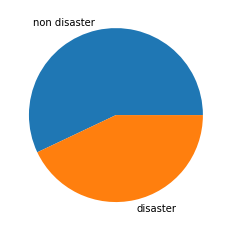

In [125]:
labels = ["non disaster", "disaster"]
plt.pie(values, labels=labels)
plt.show()

### 1.4 Get number of characters in tweets

In [86]:
calculate_len = lambda x: len(str(x))

disaster_tweet_len = list(map(calculate_len, train[train['target']==1]['text']))
no_disaster_tweet_len = list(map(calculate_len, train[train['target']==0]['text']))

Text(0.5, 0, 'Disaster tweets')

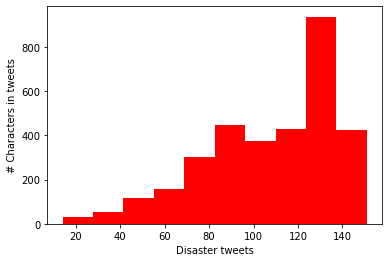

In [87]:
plt.hist(disaster_tweet_len, color='red')
plt.ylabel('# Characters in tweets')
plt.xlabel('Disaster tweets')

Text(0.5, 0, 'No Disaster tweets')

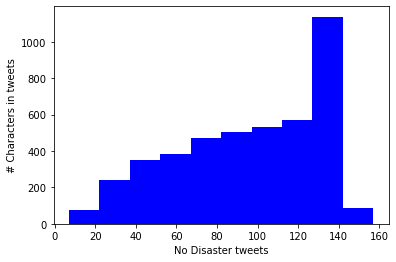

In [88]:
plt.hist(no_disaster_tweet_len, color='blue')
plt.ylabel('# Characters in tweets')
plt.xlabel('No Disaster tweets')

### 1.5 Get number of words in each tweet

In [89]:
calculate_words = lambda x: str(x).split()

disaster_tweet_len = list(map(lambda x: len(x), list(map(calculate_words, train[train['target']==1]['text']))))
no_disaster_tweet_len = list(map(lambda x: len(x), list(map(calculate_words, train[train['target']==0]['text']))))

Text(0.5, 0, 'Disaster tweets')

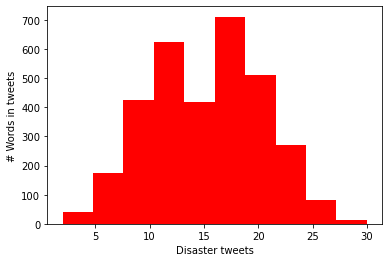

In [90]:
plt.hist(disaster_tweet_len, color='red')
plt.ylabel('# Words in tweets')
plt.xlabel('Disaster tweets')

Text(0.5, 0, 'No Disaster tweets')

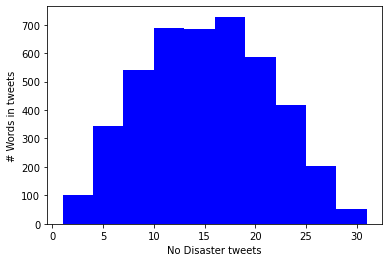

In [91]:
plt.hist(no_disaster_tweet_len, color='blue')
plt.ylabel('# Words in tweets')
plt.xlabel('No Disaster tweets')

### 1.6 Analize punctuations marks in disaster and no disaster class

In [92]:
import string
from collections import defaultdict

# Define corpus both both classes
punctuation_corpus_no_disaster = [i for x in str(train[train['target']==0]['text']).split() for i in x]
punctuation_corpus_disaster = [i for x in str(train[train['target']==0]['text']).split() for i in x]

def count_punctuation_marks(corpus):
    punctuation_counter = defaultdict(int)
    for word in corpus:
        if word in string.punctuation:
            punctuation_counter[word] = punctuation_counter[word]+1
    return punctuation_counter

<BarContainer object of 7 artists>

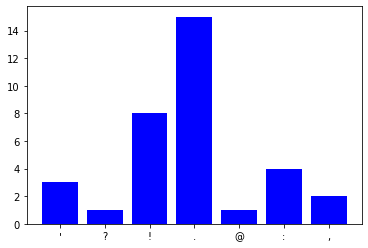

In [93]:
# Punctuation marks for no disaster tweets
pmark, counter = zip(*count_punctuation_marks(punctuation_corpus_no_disaster).items())

plt.bar(pmark, counter, color='blue')

<BarContainer object of 7 artists>

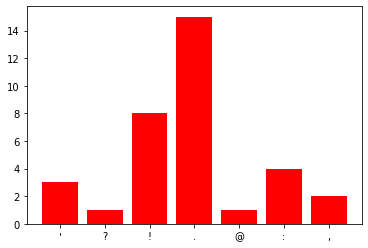

In [94]:
# Punctuation marks for disaster tweets
pmark_disaster, counter_disaster = zip(*count_punctuation_marks(punctuation_corpus_disaster).items())

plt.bar(pmark_disaster, counter_disaster, color='red')

### 1.7 Download stopwords

In [95]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 1.8 Get the most common words for disaster and no disaster tweets

In [96]:
corpus_no_disaster = [x for x in str(train[train['target']==0]['text']).split()]
corpus_disaster = [x for x in str(train[train['target']==0]['text']).split()]

<AxesSubplot:ylabel='words'>

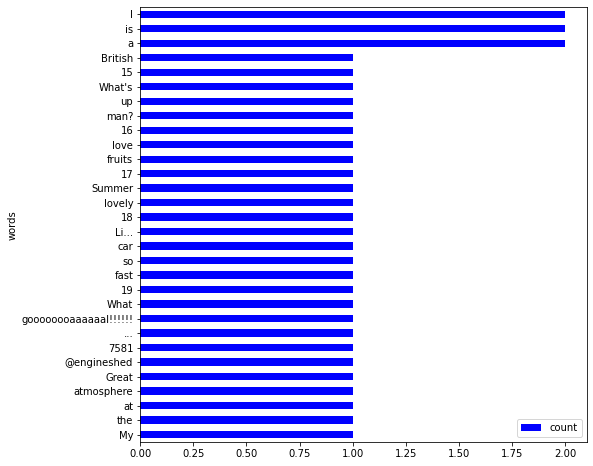

In [97]:
from collections import Counter

counter = Counter(corpus_no_disaster)
top_counting = counter.most_common()

most_common_words_no_disaster = pd.DataFrame(top_counting[:30],
                             columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(8, 8))
most_common_words_no_disaster.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="blue")

<AxesSubplot:ylabel='words'>

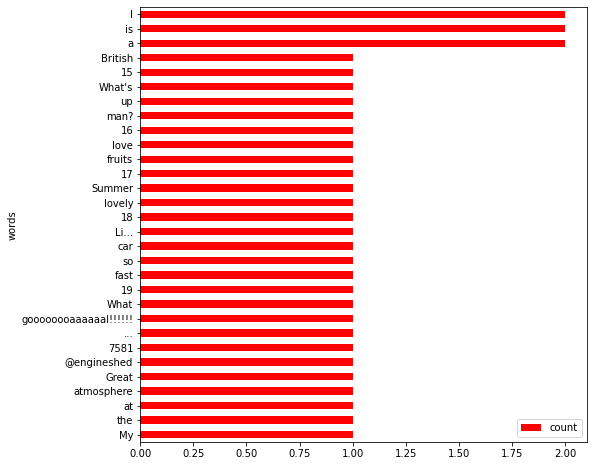

In [98]:
# Code for disaster tweets
counter = Counter(corpus_disaster)
top_counting = counter.most_common()

most_common_words_disaster = pd.DataFrame(top_counting[:30],
                             columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(8, 8))
most_common_words_disaster.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="red")

### 1.9 Bigram analysis for disaster and no disaster tweets

<BarContainer object of 10 artists>

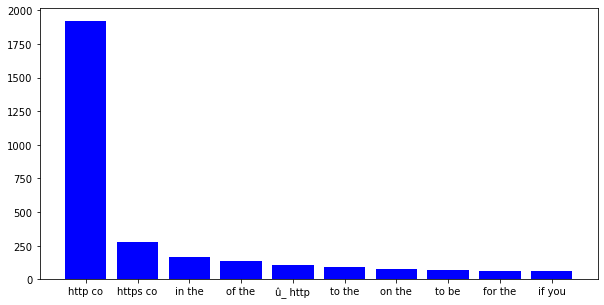

In [99]:
from sklearn.feature_extraction.text import CountVectorizer

corpus_no_disaster_text = train[train['target']==0]['text']

vector = CountVectorizer(ngram_range=(2, 2))
ngrams = vector.fit_transform(corpus_no_disaster_text)

# Counting frecuency of ngrams
ngrams_frecuency = ngrams.sum(axis=0)

# Get the top ngrams
words_frequency = [(word, ngrams_frecuency[0, index]) for word, index in vector.vocabulary_.items()]
top_words = sorted(words_frequency, key = lambda x: x[1], reverse=True)[:10]

plt.figure(figsize=(10,5))
x,y = map(list, zip(*top_words))
plt.bar(x, y, color='blue')

<BarContainer object of 10 artists>

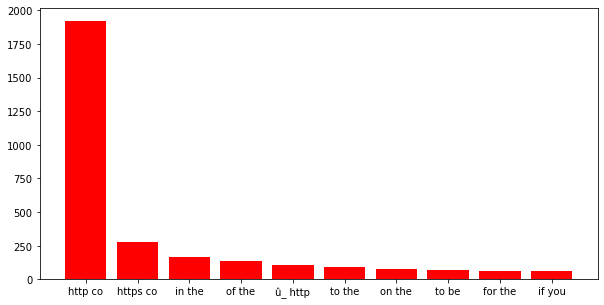

In [100]:
corpus_no_disaster_text = train[train['target']==1]['text']

vector_disaster = CountVectorizer(ngram_range=(2, 2))
ngrams_disaster = vector.fit_transform(corpus_no_disaster_text)

# Counting frecuency of ngrams
ngrams_frecuency_disaster = ngrams.sum(axis=0)

# Get the top ngrams
words_frequency_disaster = [(word, ngrams_frecuency_disaster[0, index]) for word, index in vector.vocabulary_.items()]
top_words_disaster = sorted(words_frequency_disaster, key = lambda x: x[1], reverse=True)[:10]

plt.figure(figsize=(10,5))
x,y = map(list, zip(*top_words))
plt.bar(x, y, color='red')

## 2. Data cleaning

In [101]:
import re

def text_to_lower(text):
    """Make text lowercase"""
    return text.lower()

def remove_square_brackets(text):
    """Remove square brackets"""
    text = re.sub('\[.*?\]', '', text)
    return text

def remove_links(text):
    """Remove links"""
    text = re.sub('https?://\S+|www\.\S+', '', text)
    return text

def remove_punctuation_marks(text):
    """Remove punctuation marks"""
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    return text

def remove_words_numbers(text):
    """Remove words that are numbers"""
    text = re.sub('\w*\d\w*', '', text)
    return text

### 2.1 Applying the cleaning function to both test and training datasets

In [102]:
train['text'].apply(lambda x: text_to_lower(x)) \
    .apply(lambda x: remove_square_brackets(x)) \
    .apply(lambda x: remove_links(x)) \
    .apply(lambda x: remove_punctuation_marks(x)) \
    .apply(lambda x: remove_words_numbers(x))

test['text'].apply(lambda x: text_to_lower(x)) \
    .apply(lambda x: remove_square_brackets(x)) \
    .apply(lambda x: remove_links(x)) \
    .apply(lambda x: remove_punctuation_marks(x)) \
    .apply(lambda x: remove_words_numbers(x))

train['text'].head()

0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
3    13,000 people receive #wildfires evacuation or...
4    Just got sent this photo from Ruby #Alaska as ...
Name: text, dtype: object

## 3. Preprocessing

### 3.1 Tokenization

Firt, it is necessary to perform tokenization to split the text into sentences of words. With this tokenization step we get the text into a format that is easier to convert to raw numbers, which can actually be used for the model later.

In [105]:
train_values = train.text.values
train_classes = train.target.values
test_values = test.text.values

In [106]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences


word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(train_values)

train_sequences = word_tokenizer.texts_to_sequences(train_values)
test_sequences = word_tokenizer.texts_to_sequences(test_values)

# Chosen len = 14 because is the max length of a tweet
train_padding_sequences = pad_sequences(train_sequences, maxlen=140, padding='post')
test_padding_sequences = pad_sequences(test_sequences, maxlen=140, padding='post')


vocabulary_length = len(word_tokenizer.word_index) + 1

### 3.2 GloVe

To obtain a vector representation for words we can use an unsupervised learning algorithm called GloVe (Global Vectors for Word Representation), which focuses on words co-occurrences over the whole corpus. Its embeddings relate to the probabilities that two words appear together

In [107]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!mkdir ./input/glove6b
!unzip -q glove.6B.zip -d ./input/glove6b

--2021-03-29 16:18:04--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-03-29 16:18:04--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-03-29 16:18:05--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [108]:
# Code taken from a tutorial in Keras official web page (https://keras.io/examples/nlp/pretrained_word_embeddings/)

embeddings_index = {}
with open('./input/glove6b/glove.6B.100d.txt') as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

In [109]:
# Code taken from a tutorial in Keras official web page (https://keras.io/examples/nlp/pretrained_word_embeddings/)

num_tokens = vocabulary_length + 2
embedding_dim = 100
hits = 0
misses = 0

# Prepare embedding matrix
embedding_matrix = np.zeros((num_tokens, embedding_dim))
word_index = word_tokenizer.word_index

for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1

In [110]:
!rm -rf ./input/glove6b
!rm glove.6B.zip

## 4. Model preparation and implementation

For solving this problem I decided to use LSTM (long short-term memory) model because it solves a vanishing gradient problem.

### 4.1 Model implementation

In [111]:
import keras
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM,Embedding, BatchNormalization, Dense, Dropout, Bidirectional, GlobalMaxPool1D

In [112]:
# Split the data to pass to the model
X_train, X_test, y_train, y_test = train_test_split(train_padding_sequences, train_classes, test_size=0.2)

embedding_layer = Embedding(input_dim=embedding_matrix.shape[0], \
                    output_dim=embedding_matrix.shape[1], \
                    weights = [embedding_matrix], \
                    input_length=train_padding_sequences.shape[1])

model = Sequential()
model.add(embedding_layer)
model.add(Bidirectional(LSTM(train_padding_sequences.shape[1], return_sequences=True)))
model.add(GlobalMaxPool1D())
model.add(BatchNormalization())
model.add(Dropout(0.6))
model.add(Dense(train_padding_sequences.shape[1], activation="relu"))
model.add(Dropout(0.6))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [113]:
!pip install pydot

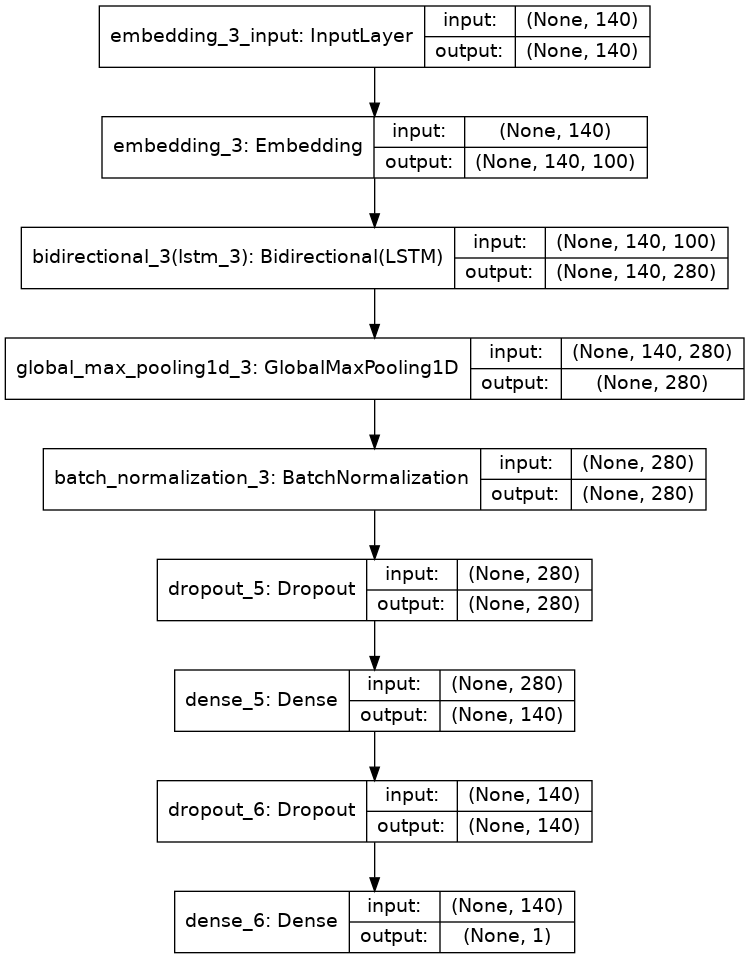

In [114]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

### 4.2 Model training

In [115]:
history = model.fit(
    X_train, 
    y_train, 
    epochs = 7,
    validation_data = [X_test, y_test])

/home/ec2-user/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 6090 samples, validate on 1523 samples
Epoch 1/7
6090/6090 [==============================] - 190s 31ms/step - loss: 0.6944 - accuracy: 0.7194 - val_loss: 0.5673 - val_accuracy: 0.7360
Epoch 2/7
6090/6090 [==============================] - 310s 51ms/step - loss: 0.5001 - accuracy: 0.7829 - val_loss: 0.5450 - val_accuracy: 0.7150
Epoch 3/7
6090/6090 [==============================] - 349s 57ms/step - loss: 0.4616 - accuracy: 0.8016 - val_loss: 0.7508 - val_accuracy: 0.7111
Epoch 4/7
6090/6090 [==============================] - 373s 61ms/step - loss: 0.4040 - accuracy: 0.8299 - val_loss: 0.5394 - val_accuracy: 0.7899
Epoch 5/7
6090/6090 [==============================] - 393s 65ms/step - loss: 0.3813 - accuracy: 0.8447 - val_loss: 0.5846 - val_accuracy: 0.7932
Epoch 6/7
6090/6090 [==============================] - 367s 60ms/step - loss: 0.3539 - accuracy: 0.8593 - val_loss: 0.5014 - val_accuracy: 0.8063
Epoch 7/7
6090/6090 [==============================] - 309s 51ms/step - loss

## 5 Model evaluation

In [117]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Loss:', loss)
print('Accuracy:', accuracy)

1523/1523 [==============================] - 3s 2ms/step
Loss: 0.7315985792495667
Accuracy: 0.7859488129615784


### 5.1 Model reporting

In [118]:
pred_class = model.predict_classes(X_test)

In [119]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

print("Accuracy: ", metrics.accuracy_score(y_test, pred_class))
print("Precision", metrics.precision_score(y_test, pred_class))
print("Recall", metrics.recall_score(y_test, pred_class))
print("Recall", metrics.f1_score(y_test, pred_class))

Accuracy:  0.7859487852921865
Precision 0.8367729831144465
Recall 0.6510948905109489
Recall 0.7323481116584565


In [120]:
# Model created to compare in benchmark section
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()

nb.fit(X_train, y_train)
pred_class = nb.predict(X_test)

print("Accuracy: ", metrics.accuracy_score(y_test, pred_class))
print("Precision", metrics.precision_score(y_test, pred_class))
print("Recall", metrics.recall_score(y_test, pred_class))
print("Recall", metrics.f1_score(y_test, pred_class))

Accuracy:  0.5837163493105713
Precision 0.537117903930131
Recall 0.5386861313868613
Recall 0.5379008746355686
